# 💣 BombCell Comprehensive Plotting Guide 💣

This notebook provides a complete guide to all plotting and visualization capabilities in BombCell.
Each plotting function is demonstrated in its own cell with clear documentation.

## 📋 Table of Contents

### 1. Setup & Data Loading
   - Installation instructions
   - Import libraries
   - Load BombCell session from JSON
   - Initialize parameters

### 2. Summary Plots (High-Level Visualization)
   - **2.1** Waveforms Overlay Plot
   - **2.2** Quality Metrics Histograms
   - **2.3** UpSet Plots (Metric Interconnections)

### 3. Individual Unit Quality Plots
   - **3.1** Template Waveform (Multi-channel)
   - **3.2** Raw Waveform Overlay
   - **3.3** Autocorrelogram (ACG)
   - **3.4** Amplitude Histogram with Gaussian Fit
   - **3.5** Spatial Decay Plot
   - **3.6** Amplitude Over Time (Drift)
   - **3.7** Time Bin Metrics
   - **3.8** Unit Location on Probe
   - **3.9** Amplitude Fit & Missing Spikes

### 4. Cell Type Classification Plots
   - **4.1** Cortical Cell Classification (Pyramidal/Interneuron)
   - **4.2** Striatal Cell Classification (MSN/FSI/TAN/UIN)

### 5. Interactive GUI
   - **5.1** Launch Interactive Unit Quality GUI
   - **5.2** Pre-compute GUI Data for Fast Loading

---

# 1. Setup & Data Loading

## 1.1 Installation Instructions

To install BombCell, run one of the following:

**Latest stable version:**
```bash
conda create -n bombcell python=3.11
conda activate bombcell
pip install uv
uv pip install bombcell
```

**Development version (latest updates):**
```bash
conda create -n bombcell python=3.11
conda activate bombcell
git clone https://github.com/Julie-Fabre/bombcell.git
cd bombcell/py_bombcell
pip install uv
uv pip install -e .
```

## 1.2 Import Libraries

In [174]:
import os
import sys
from pathlib import Path
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

# Import BombCell
import bombcell as bc

print(f"BombCell version: {bc.__version__ if hasattr(bc, '__version__') else 'unknown'}")
print("✅ All libraries imported successfully!")

BombCell version: 0.72
✅ All libraries imported successfully!


## 1.3 Load BombCell Session

### Option A: Load from existing Kilosort directory (standard workflow)

If you have already run BombCell and have a Kilosort directory with saved results:

In [176]:
from pathlib import Path
import sys
import numpy as np
import pandas as pd
import bombcell as bc

analysis_dir = Path.cwd().resolve()
sys.path.insert(0, str(analysis_dir))
from post_analysis_setup import load_post_analysis_context

CONFIG_FILE = r'C:\Users\user\Documents\github\bombcell\py_bombcell\grant\configs\grant_recording_config_reach15_20260201_session007_single_probe.json'
BASELINE_CONFIG_FILE = r'C:\Users\user\Documents\github\bombcell\py_bombcell\grant\configs\grant_recording_config_reach15_20260201_session007_single_probe.json'
RUN_MODE = 'single_probe_date'   # batch | single_probe | np20_rerun | single_probe_date
TARGET_PROBE = 'D'   # A-F

if Path(CONFIG_FILE).exists():
    print(f"Using config file: {CONFIG_FILE}")
else:
    raise FileNotFoundError(f"Config file not found: {CONFIG_FILE}")
if Path(BASELINE_CONFIG_FILE).exists():
    print(f"Using baseline config file: {BASELINE_CONFIG_FILE}")    
else:
    raise FileNotFoundError(f"Baseline config file not found: {BASELINE_CONFIG_FILE}")

Using config file: C:\Users\user\Documents\github\bombcell\py_bombcell\grant\configs\grant_recording_config_reach15_20260201_session007_single_probe.json
Using baseline config file: C:\Users\user\Documents\github\bombcell\py_bombcell\grant\configs\grant_recording_config_reach15_20260201_session007_single_probe.json


In [177]:
from post_analysis_setup import load_post_analysis_context
globals().update(load_post_analysis_context(BASELINE_CONFIG_FILE))
print('Loaded config for', NP_recording_name)

ctx = load_post_analysis_context(CONFIG_FILE)
mode_to_roots = {
    'batch': (ctx['DEFAULT_KS_STAGING_ROOT'], ''),
    'np20_rerun': (ctx['NP20_KS_STAGING_ROOT'], ''),
    'single_probe': (ctx['BOMBCELL_KS_SINGLEPROBE_STAGING_ROOT'], ''),
    'single_probe_date': (ctx['BOMBCELL_KS_SINGLEPROBE_STAGING_ROOT_DATE'], ''),
}

staging_root, save_subdir = mode_to_roots[RUN_MODE]
baseline_ks_dir = Path(staging_root) / f'kilosort4_{TARGET_PROBE}'
baseline_save_path = baseline_ks_dir / 'bombcell' / save_subdir

print(f"KS Dir: {baseline_ks_dir}")
print(f"Save Path: {baseline_save_path}")

Loaded config for Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00
KS Dir: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe_20260218\kilosort4_D
Save Path: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe_20260218\kilosort4_D\bombcell


In [178]:
from post_analysis_setup import load_post_analysis_context
globals().update(load_post_analysis_context(CONFIG_FILE))
print('Loaded config for', NP_recording_name)

ctx = load_post_analysis_context(CONFIG_FILE)
mode_to_roots = {
    'batch': (ctx['DEFAULT_KS_STAGING_ROOT'], ''),
    'np20_rerun': (ctx['NP20_KS_STAGING_ROOT'], ''),
    'single_probe': (ctx['BOMBCELL_KS_SINGLEPROBE_STAGING_ROOT'], ''),
    'single_probe_date': (ctx['BOMBCELL_KS_SINGLEPROBE_STAGING_ROOT_DATE'], ''),
}

staging_root, save_subdir = mode_to_roots[RUN_MODE]
ks_dir = Path(staging_root) / f'kilosort4_{TARGET_PROBE}'
save_path = ks_dir / 'bombcell' / save_subdir

print('ks_dir:', ks_dir)
print('save_path:', save_path)
PROBE_DIRS = ctx['PROBE_DIRS']
STRUCTURE_OEBIN = ctx['STRUCTURE_OEBIN']

# Optional per-notebook convenience aliases
probeA_Dir = str(PROBE_DIRS['A'])
probeB_Dir = str(PROBE_DIRS['B'])
probeC_Dir = str(PROBE_DIRS['C'])
probeD_Dir = str(PROBE_DIRS['D'])
probeE_Dir = str(PROBE_DIRS['E'])
probeF_Dir = str(PROBE_DIRS['F'])
structur_oebin = str(STRUCTURE_OEBIN)
continuousDir = [str(CONTINUOUS_DAT_PATHS[p]) for p in ['A','B','C','D','E','F']]
continuousDirs = continuousDir  # backwards-compatible alias
probeLetters = ['A','B','C','D','E','F']
continuousDirs

#
raw_file_path = continuousDirs[ord(TARGET_PROBE) - ord('A')]
print(f"Raw data file for probe {TARGET_PROBE}: {raw_file_path}")

# Results directory for the target probe
# correctly combine paths to cretate results_dir
results_dir = save_path 
print(f"Results directory for probe {TARGET_PROBE}: {results_dir}")

meta_file_path = structur_oebin
print(f'==============================================================')
#check for existence of files
if not Path(raw_file_path).exists():
    raise FileNotFoundError(f"Raw data file not found: {raw_file_path}")
if not Path(meta_file_path).exists():
    raise FileNotFoundError(f"Meta data file not found: {meta_file_path}")
if not ks_dir.exists():
    raise FileNotFoundError(f"Kilosort directory not found: {ks_dir}")  
if not Path(results_dir).exists():
    raise FileNotFoundError(f"Results directory not found: {results_dir}")
print(f"All necessary files found.")

Loaded config for Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00
ks_dir: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe_20260218\kilosort4_D
save_path: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe_20260218\kilosort4_D\bombcell
Raw data file for probe D: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeD\continuous.dat
Results directory for probe D: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe_20260218\kilosort4_D\bombcell
All necessary files found.


In [179]:
print("TARGET_PROBE:", TARGET_PROBE)  # New Code
print('==============================')
print('')
print("ks_dir:", ks_dir)  # New Code
print("raw_file_path:", raw_file_path)  # New Code
print("meta_file_path:", meta_file_path)  # New Code
print("save_path:", save_path)  # New Code
print("results_dir:", results_dir)  # New Code



TARGET_PROBE: D

ks_dir: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe_20260218\kilosort4_D
raw_file_path: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeD\continuous.dat
meta_file_path: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\structure.oebin
save_path: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe_20260218\kilosort4_D\bombcell
results_dir: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe_20260218\kilosort4_D\bombcell


In [180]:

# Initialize parameters
param = bc.get_default_parameters(
    ks_dir,
    raw_file=raw_file_path,
    meta_file=meta_file_path,
    kilosort_version=4  # Change to 2 or 3 if using older Kilosort
)

print(f"✅ Loaded parameters for: {ks_dir}")

✅ Loaded parameters for: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe_20260218\kilosort4_D


### Option B: Load pre-computed results from JSON

If you have BombCell results saved as JSON files in the `bombcell` subdirectory:

In [181]:
results_dir

WindowsPath('H:/Grant/Neuropixels/Kilosort_Recordings/Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00/bombcell/bombcell_single_probe_20260218/kilosort4_D/bombcell')

In [182]:
# Load saved BombCell results
bombcell_dir = Path(ks_dir) / "bombcell" / "bombcell_single_probe" / "single_probe_results" / f"Probe_{TARGET_PROBE}"

import json

# load Probe_B_quality_metrics.csv
csv_path = Path(results_dir) / f"Probe_{TARGET_PROBE}_quality_metrics.csv"
if csv_path.exists():
    df_csv = pd.read_csv(csv_path)
    print(f"✅ Loaded quality metrics from CSV for probe {TARGET_PROBE}, shape: {df_csv.shape}")
    # Optionally, you can convert the DataFrame to a dictionary of numpy arrays
    quality_metrics = {col: df_csv[col].to_numpy() for col in df_csv.columns}
else:
    print(f"⚠️ CSV file for probe {TARGET_PROBE} not found at {csv_path}")

# Load unit classifications
with open(results_dir / f"Probe_{TARGET_PROBE}_param.json", 'r') as f:
    saved_params = json.load(f)

print(f"✅ Loaded {len(quality_metrics.get('rawAmplitude', []))} units from saved results")

✅ Loaded quality metrics from CSV for probe D, shape: (820, 31)
✅ Loaded 820 units from saved results


In [183]:
quality_metrics
saved_params

{'plotDetails': False,
 'plotGlobal': True,
 'savePlots': False,
 'plotsSaveDir': None,
 'verbose': True,
 'reextractRaw': False,
 'saveAsTSV': True,
 'unit_type_for_phy': True,
 'ephysKilosortPath': 'H:\\Grant\\Neuropixels\\Kilosort_Recordings\\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\\bombcell\\bombcell_single_probe\\kilosort4_D',
 'removeDuplicateSpikes': False,
 'duplicateSpikeWindow_s': 3.4e-05,
 'saveSpikes_withoutDuplicates': True,
 'recomputeDuplicateSpikes': False,
 'detrendWaveform': True,
 'detrendForUnitMatch': False,
 'nRawSpikesToExtract': 100,
 'decompress_data': False,
 'extractRaw': True,
 'probeType': 1,
 'tauR_valuesMin': 0.002,
 'tauR_valuesMax': 0.002,
 'tauR_valuesStep': 0.0005,
 'tauC': 0.0001,
 'hillOrLlobetMethod': True,
 'computeTimeChunks': False,
 'deltaTimeChunk': 360,
 'presenceRatioBinSize': 120,
 'driftBinSize': 60,
 'computeDrift': False,
 'minThreshDetectPeaksTroughs': 0.2,
 'normalizeSpDecay': True,
 'spDecayLinFit': False

## 1.4 Run BombCell Analysis

If you haven't run BombCell yet, or want to re-run with different parameters:

In [184]:
# Optional: Customize parameters before running
# Uncomment and modify as needed:

# Enable/disable optional computations
# param["computeDrift"] = True  # Enable drift computation (slower)
# param["computeDistanceMetrics"] = True  # Enable isolation distance & L-ratio (much slower)
# param["splitGoodAndMua_NonSomatic"] = True  # Split non-somatic into good/MUA (5 categories)

# Adjust classification thresholds
# param["maxRPVviolations"] = 0.1  # Maximum refractory period violations
# param["minAmplitude"] = 40  # Minimum amplitude in µV
# param["minSNR"] = 5  # Minimum signal-to-noise ratio

# # Enable plotting and saving
# param["plotGlobal"] = True  # Generate summary plots
# param["savePlots"] = False  # Set to True to save plots to disk
# param["verbose"] = True  # Print progress updates

# print("Running BombCell analysis...")
# quality_metrics, unit_type, unit_type_string = bc.run_bombcell(param)
# print(f"✅ BombCell analysis complete! Classified {len(unit_type)} units")

## 1.5 Load Ephys Data

Load template waveforms and other ephys data needed for plotting:

In [185]:
# Load ephys data
(
    spike_templates,
    spike_clusters,
    template_waveforms,
    channel_positions,
    cluster_ids,
    spike_times,
    spike_amplitudes,
) = bc.load_ephys_data(ks_dir)

print(f"✅ Loaded ephys data:")
print(f"   - {len(np.unique(spike_clusters))} units")
print(f"   - {len(spike_times)} total spikes")
print(f"   - Template shape: {template_waveforms.shape}")
print(f"   - {len(channel_positions)} channels")

✅ Loaded ephys data:
   - 820 units
   - 820 total spikes
   - Template shape: (820, 61, 384)
   - 59026802 channels


## 1.6 Summary of Unit Classifications

Display breakdown of unit classifications:

In [186]:
# Load Bombcell results
param, quality_metrics, _ = bc.load_bc_results(str(save_path))

# Get unit classifications
unit_type, unit_type_string = bc.qm.get_quality_unit_type(param, quality_metrics)

# Create DataFrame
qm_df = pd.DataFrame(quality_metrics).copy()
qm_df['bombcell_label'] = unit_type_string
qm_df['unit_index'] = np.arange(len(qm_df))

# Get cluster IDs
if 'cluster_id' not in qm_df.columns:
    if 'unique_templates' in param:
        qm_df['cluster_id'] = param['unique_templates']
    elif 'phy_clusterID' in quality_metrics:
        qm_df['cluster_id'] = quality_metrics['phy_clusterID']
    else:
        qm_df['cluster_id'] = qm_df['unit_index']

print(f'Loaded {len(qm_df)} units')
print('\nLabel distribution:')
print(qm_df['bombcell_label'].value_counts(dropna=False))
print('Unit_type', unit_type)

Loaded 820 units

Label distribution:
bombcell_label
MUA         477
GOOD        150
NON-SOMA    119
NOISE        74
Name: count, dtype: int64
Unit_type [3. 3. 3. 1. 1. 2. 2. 3. 1. 0. 2. 2. 0. 2. 2. 2. 1. 0. 3. 1. 2. 1. 2. 0.
 1. 1. 1. 1. 0. 2. 2. 1. 1. 2. 3. 2. 2. 2. 1. 0. 1. 2. 0. 2. 1. 1. 1. 2.
 1. 2. 1. 2. 1. 3. 1. 3. 2. 2. 0. 1. 2. 2. 1. 1. 2. 0. 1. 0. 1. 1. 2. 1.
 3. 0. 1. 0. 2. 2. 1. 1. 2. 2. 2. 3. 2. 2. 0. 2. 0. 2. 3. 3. 0. 2. 3. 1.
 1. 2. 2. 3. 1. 1. 1. 3. 1. 2. 3. 3. 0. 3. 1. 3. 2. 2. 2. 2. 3. 1. 2. 1.
 2. 1. 1. 0. 2. 2. 1. 2. 2. 0. 2. 1. 3. 2. 2. 2. 2. 2. 2. 1. 3. 2. 2. 3.
 2. 2. 2. 2. 2. 0. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 3. 2. 3. 3. 2. 2. 3. 2.
 2. 2. 3. 2. 2. 2. 3. 1. 2. 3. 2. 2. 2. 0. 2. 2. 2. 3. 2. 2. 2. 2. 2. 1.
 2. 2. 3. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 0. 2. 2. 2. 2. 3. 2. 3. 2.
 2. 2. 3. 2. 3. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 3. 3. 2. 2. 0. 3. 3. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 3. 3.
 2. 3. 2. 3. 2. 3. 2. 2. 0. 3. 2. 2. 0. 0. 3

---
# 2. Summary Plots (High-Level Visualization)

These plots provide an overview of all units and their quality metrics.

## 2.1 Waveforms Overlay Plot

**Purpose:** Visualize the diversity of waveform shapes within each unit classification category.

**What it shows:**
- Overlaid template waveforms for all units in each category
- Separate subplot for each unit type (Noise, Somatic Good, Somatic MUA, Non-somatic)
- All waveforms shown at their max channel (where amplitude is largest)

**Parameters used:**
- `param["splitGoodAndMua_NonSomatic"]`: If True, creates 5 categories instead of 4
- `param["savePlots"]`: If True, saves figure to disk
- `param["plotsSaveDir"]`: Directory to save plots (defaults to kilosort_path/bombcell_plots/)

**Data requirements:**
- Template waveforms (from `templates.npy` in Kilosort output)
- Quality metrics with `maxChannels` computed
- Unit classifications

**How to modify your BombCell runs:**
- No special modifications needed - template waveforms are always available
- To enable plot saving: `param["savePlots"] = True`

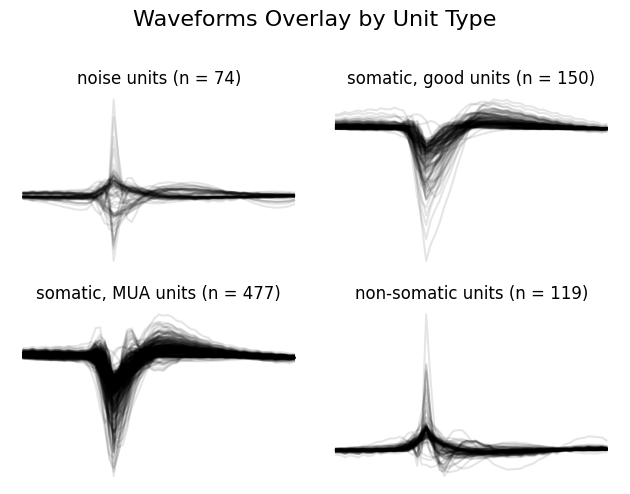


📊 Waveform Overlay Plot:
   - Black traces: Individual unit waveforms at max channel
   - Alpha transparency shows density of units
   - Each subplot shows one classification category


In [187]:
import matplotlib.pyplot as plt
# Generate waveforms overlay plot
fig = bc.plot_waveforms_overlay(
    quality_metrics=quality_metrics,
    template_waveforms=template_waveforms,
    unit_type=unit_type,
    param=param,
    save_dir=None  # Set to Path object to save
)

plt.suptitle("Waveforms Overlay by Unit Type", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("\n📊 Waveform Overlay Plot:")
print("   - Black traces: Individual unit waveforms at max channel")
print("   - Alpha transparency shows density of units")
print("   - Each subplot shows one classification category")

## 2.2 Quality Metrics Histograms

**Purpose:** Visualize the distribution of all quality metrics across units, with classification thresholds.

**What it shows:**
- One histogram per computed quality metric
- Vertical black lines: Classification thresholds
- Horizontal colored bars: "Good" (middle) vs "Bad" (left/right) regions
- Color-coded labels showing which region corresponds to which classification

**Metrics displayed (17 total):**

**Waveform-based (Noise classification):**
- # peaks: Number of peaks in waveform
- # troughs: Number of troughs in waveform  
- baseline flatness: Baseline noise level relative to peak
- waveform duration: Peak-to-trough duration (µs)
- peak_2/trough: Ratio of second peak to trough (somatic vs axonal)
- spatial decay: Decay of amplitude across channels (exp fit)

**Non-somatic classification:**
- peak_1/peak_2: Ratio of first to second peak
- peak_main/trough: Ratio of main peak to trough

**Amplitude & Noise:**
- amplitude: Spike amplitude (µV)
- signal/noise (SNR): Signal-to-noise ratio

**Spike train quality (MUA classification):**
- refractory period viol. (RPV): Fraction of spikes in refractory period
- # spikes: Total spike count
- presence ratio: Fraction of recording time with spikes
- % spikes missing: Estimated missing spikes from amplitude distribution
- max. drift: Maximum spatial drift (µm)

**Optional distance metrics (if enabled):**
- isolation dist.: Mahalanobis distance to nearest cluster
- L-ratio: Cluster isolation quality

**Parameters used:**
- All threshold parameters (e.g., `param["maxRPVviolations"]`, `param["minAmplitude"]`, etc.)
- `param["computeDrift"]`: Enables drift histogram
- `param["computeDistanceMetrics"]`: Enables isolation distance & L-ratio histograms

**Data requirements:**
- Quality metrics dictionary with computed values
- All standard metrics are computed by default
- Optional metrics require specific parameters enabled

**How to modify your BombCell runs to enable optional metrics:**
```python
# Enable drift computation (adds ~1-2 min per session)
param["computeDrift"] = True
param["driftBinSize"] = 60  # seconds per bin

# Enable distance metrics (adds ~5-10 min per session, requires more memory)
param["computeDistanceMetrics"] = True
param["nChannelsIsoDist"] = 4  # number of nearby channels to use
```

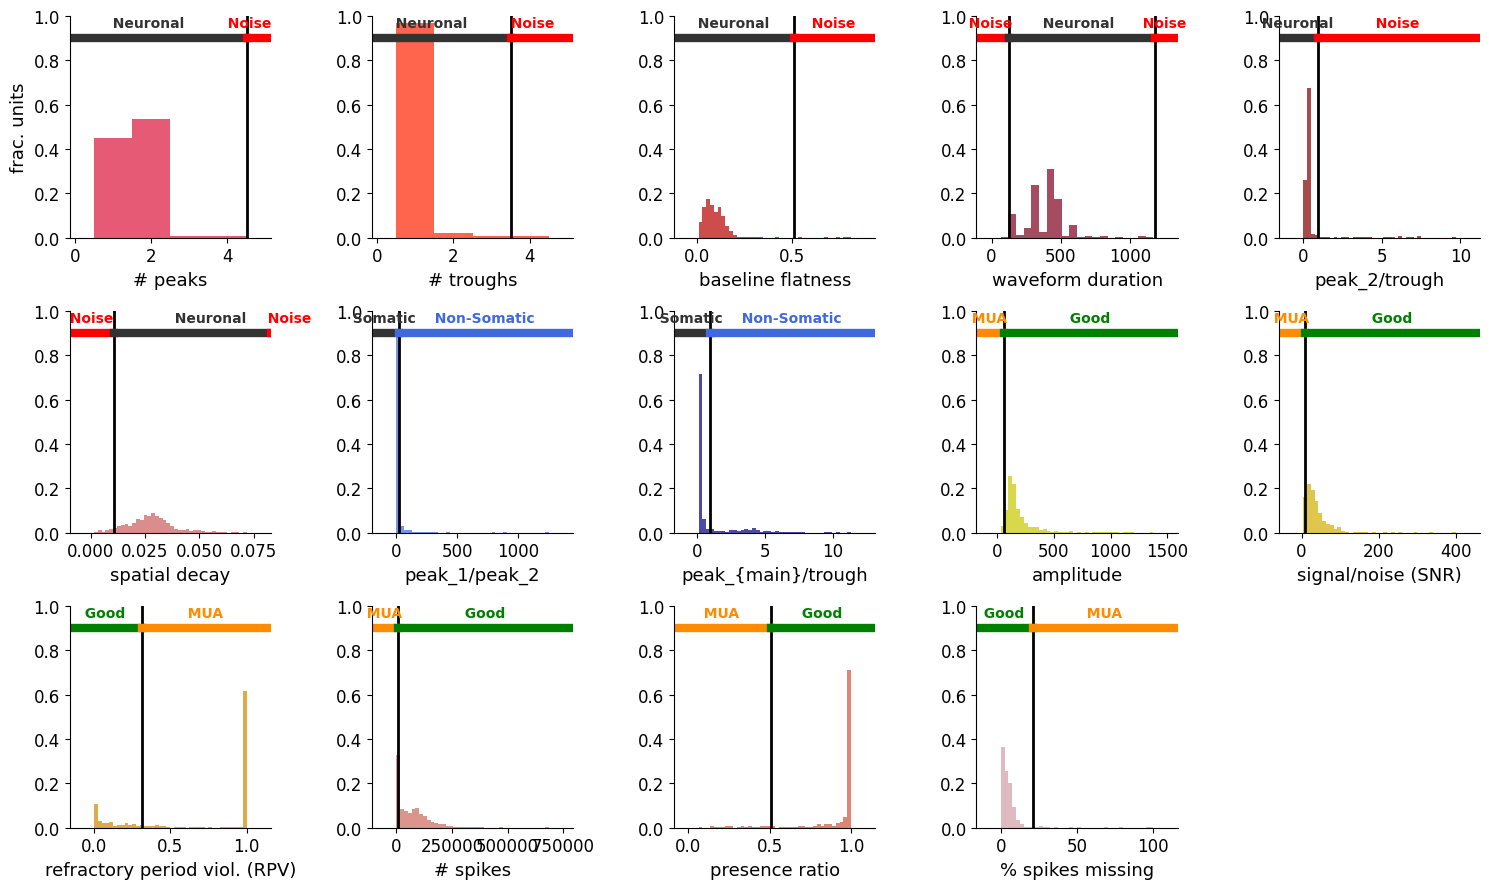


📊 Quality Metrics Histograms:
   - Black vertical lines: Classification thresholds
   - Colored horizontal bars: Pass/Fail regions
   - Y-axis: Fraction of units (probability)
   - Total metrics displayed: 28


<Figure size 640x480 with 0 Axes>

In [188]:
# Generate quality metrics histograms
fig = bc.plot_histograms(
    quality_metrics=quality_metrics,
    param=param,
    save_dir=None  # Set to Path object to save
)

print("\n📊 Quality Metrics Histograms:")
print("   - Black vertical lines: Classification thresholds")
print("   - Colored horizontal bars: Pass/Fail regions")
print("   - Y-axis: Fraction of units (probability)")
print(f"   - Total metrics displayed: {len([k for k in quality_metrics.keys() if quality_metrics[k] is not None])}")
plt.suptitle("Quality Metrics Distributions", fontsize=16, y=1.00)
plt.show()

# print("\n📊 Quality Metrics Histograms:")
# print("   - Black vertical lines: Classification thresholds")
# print("   - Colored horizontal bars: Pass/Fail regions")
# print("   - Y-axis: Fraction of units (probability)")
# print(f"   - Total metrics displayed: {len([k for k in quality_metrics.keys() if quality_metrics[k] is not None])}")

## 2.3 UpSet Plots (Metric Interconnections)

**Purpose:** Visualize how different quality metric failures combine to classify units.

**What it shows:**
- Which combinations of metric failures occur together
- Bar heights: Number of units with that specific combination
- Dot matrix (bottom): Which metrics are involved in each combination
- Connected dots: Metrics that failed together
- One plot per unit classification type

**Metrics shown per plot type:**

**NOISE plot (waveform-based failures):**
- # peaks
- # troughs  
- waveform duration
- spatial decay
- baseline flatness
- peak2 / trough

**NON-SOMA plot (axonal failures):**
- trough / peak2
- peak1 / peak2

**MUA plot (spike train failures):**
- SNR
- amplitude
- presence ratio
- # spikes
- % spikes missing
- fraction RPVs
- max. drift (if computed)
- isolation dist. (if computed)
- L-ratio (if computed)

**Parameters used:**
- `param["splitGoodAndMua_NonSomatic"]`: If True, creates separate NON-SOMA GOOD and NON-SOMA MUA plots
- All classification thresholds determine which failures are shown

**Data requirements:**
- Quality metrics dictionary
- Unit classification strings
- `upsetplot` package (automatically installed with BombCell)

**How to modify your BombCell runs:**
- Standard metrics: No modifications needed
- To split non-somatic categories: `param["splitGoodAndMua_NonSomatic"] = True`
- To include drift in MUA plot: `param["computeDrift"] = True`
- To include distance metrics in MUA plot: `param["computeDistanceMetrics"] = True`

Sample of quality metrics table:
  unit_type Original ID # peaks # troughs waveform duration baseline flatness  \
0  NON-SOMA           0   False     False             False             False   
1  NON-SOMA           1   False     False             False             False   
2  NON-SOMA           2   False     False             False             False   
3      GOOD           3   False     False             False             False   
4      GOOD           4   False     False             False             False   

  peak2 / trough spatial decay % spikes missing presence ratio # spikes  \
0          False         False            False          False    False   
1          False         False            False          False    False   
2          False         False            False          False    False   
3          False         False            False          False    False   
4          False         False            False          False    False   

  fraction RPVs amplitude    

c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:795: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  styles["linewidth"].fillna(1, inplace=True)
c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:796: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series

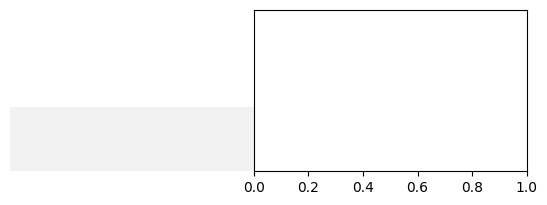

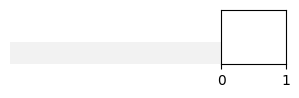

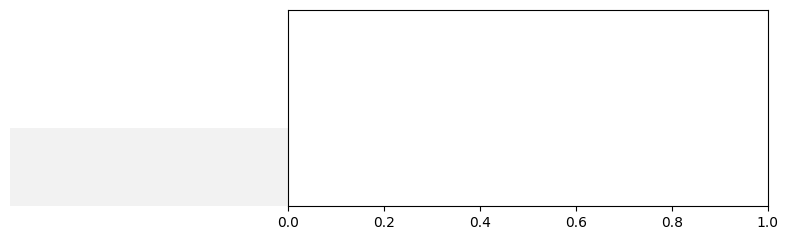


📊 UpSet Plots:
   - Each bar: Number of units with that specific failure combination
   - Connected dots: Metrics that failed together
   - Leftmost bars: Single metric failures
   - Rightmost bars: Multiple metric failures
   - Total plots generated: 3


In [189]:
# Generate upset plots
figs = bc.upset_plots(
    quality_metrics=quality_metrics,
    unit_type_string=unit_type_string,
    param=param,
    save_dir=None  # Set to Path object to save
)

plt.show()

print("\n📊 UpSet Plots:")
print("   - Each bar: Number of units with that specific failure combination")
print("   - Connected dots: Metrics that failed together")
print("   - Leftmost bars: Single metric failures")
print("   - Rightmost bars: Multiple metric failures")
print(f"   - Total plots generated: {len(figs)}")

## 2.4 All Summary Plots at Once

**Convenience function:** Generate all three summary plot types with a single call.

Sample of quality metrics table:
  unit_type Original ID # peaks # troughs waveform duration baseline flatness  \
0  NON-SOMA           0   False     False             False             False   
1  NON-SOMA           1   False     False             False             False   
2  NON-SOMA           2   False     False             False             False   
3      GOOD           3   False     False             False             False   
4      GOOD           4   False     False             False             False   

  peak2 / trough spatial decay % spikes missing presence ratio # spikes  \
0          False         False            False          False    False   
1          False         False            False          False    False   
2          False         False            False          False    False   
3          False         False            False          False    False   
4          False         False            False          False    False   

  fraction RPVs amplitude    

c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:795: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  styles["linewidth"].fillna(1, inplace=True)
c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:796: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series

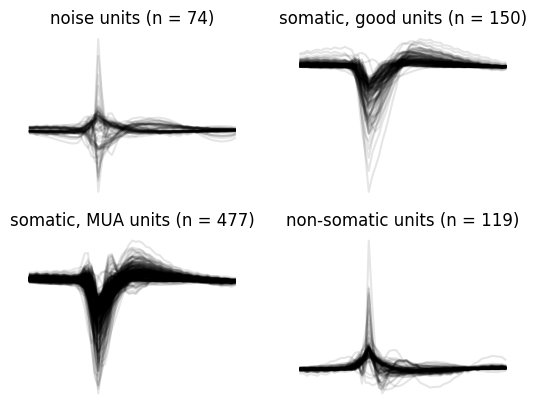

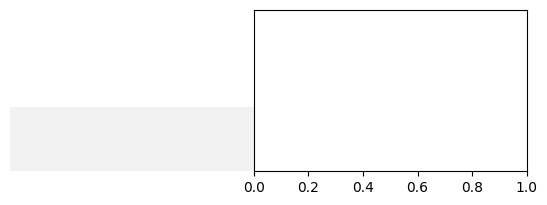

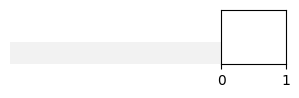

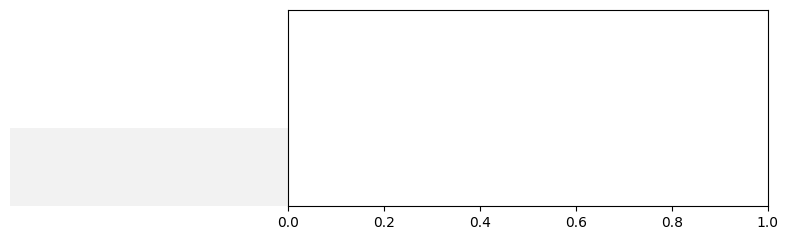

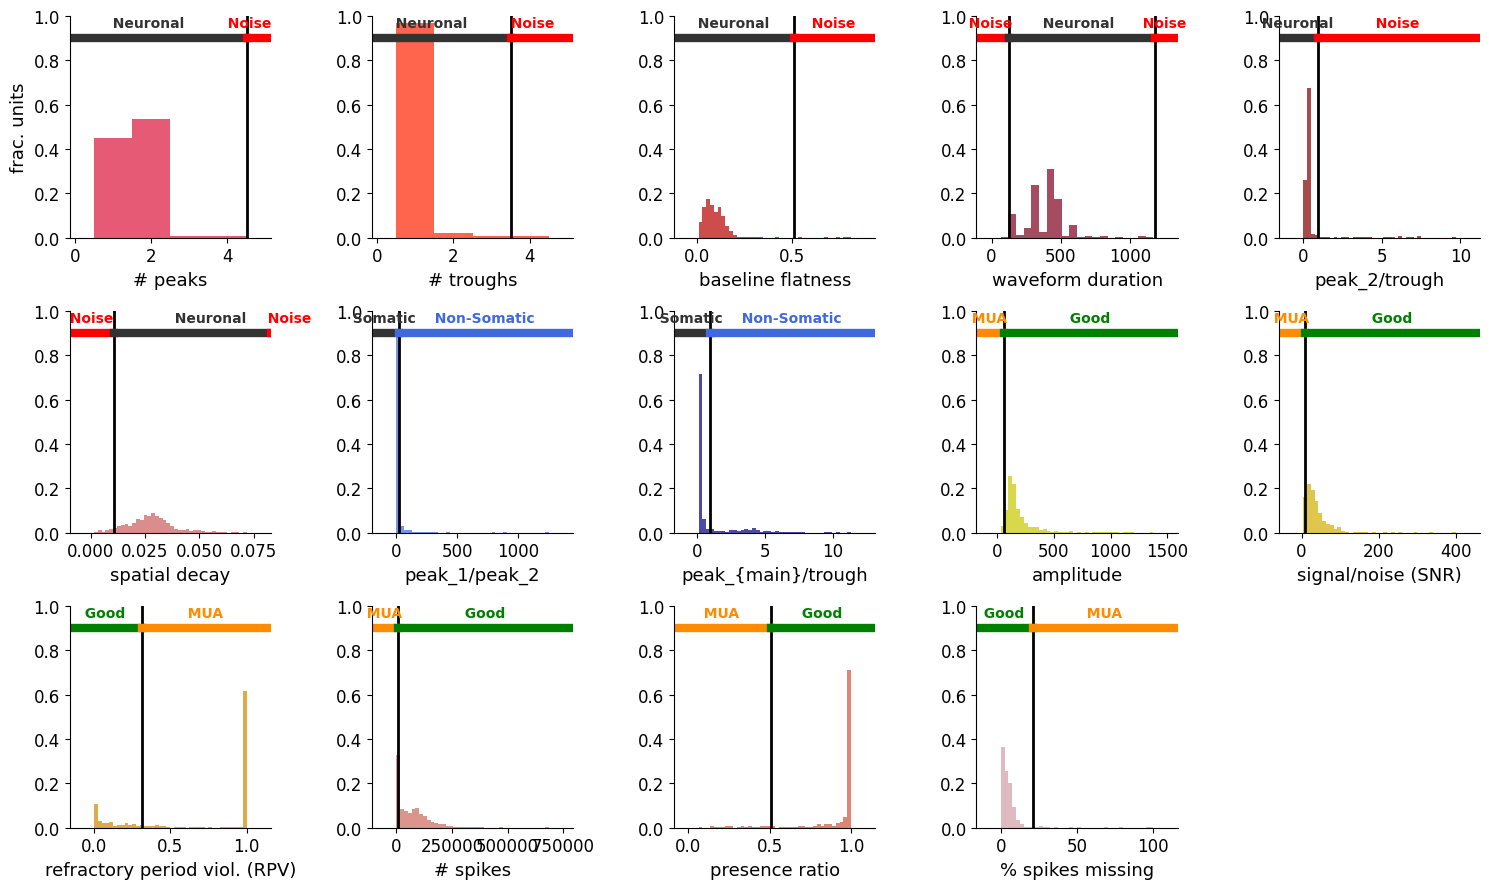


✅ Generated all summary plots:
   - Waveforms overlay: Figure(640x480)
   - Histograms: Figure(1500x900)
   - UpSet plots: 3 figures


In [190]:
# Generate all summary plots at once
figures_dict = bc.plot_summary_data(
    quality_metrics=quality_metrics,
    template_waveforms=template_waveforms,
    unit_type=unit_type,
    unit_type_string=unit_type_string,
    param=param,
    return_figures=True  # Returns dict of figure objects
)

plt.show()

print("\n✅ Generated all summary plots:")
print(f"   - Waveforms overlay: {figures_dict['waveforms_overlay']}")
print(f"   - Histograms: {figures_dict['histograms']}")
print(f"   - UpSet plots: {len(figures_dict['upset_plots'])} figures")

---
# 3. Individual Unit Quality Plots

These plots allow detailed inspection of individual units.
Each plot type can be generated independently using the GUI functions.

## 3.0 Select a Unit to Visualize

Choose a unit index to generate individual plots for:

In [214]:
# Select unit to visualize (0-indexed)
unit_idx = 187 # Change this to visualize different units
unit_id = param['unique_templates'][unit_idx] if 'unique_templates' in param else unit_idx

print(f"\n🔍 Inspecting Unit {unit_idx} (ID: {unit_id})")
print(f"   Classification: {unit_type_string[unit_idx]}")
print(f"   Amplitude: {quality_metrics['rawAmplitude'][unit_idx]:.1f} µV")
print(f"   SNR: {quality_metrics['signalToNoiseRatio'][unit_idx]:.2f}")
print(f"   # Spikes: {quality_metrics['nSpikes'][unit_idx]}")
print(f"   RPV fraction: {quality_metrics['fractionRPVs_estimatedTauR'][unit_idx]:.4f}")




🔍 Inspecting Unit 187 (ID: 187)
   Classification: MUA
   Amplitude: 188.6 µV
   SNR: 65.68
   # Spikes: 16891.0
   RPV fraction: 1.0000


## 3.1 Template Waveform (Multi-channel)

**Purpose:** Visualize the average spike waveform across multiple channels.

**What it shows:**
- Average template waveform on max channel and neighboring channels
- Peak and trough locations marked
- Waveform duration indicated
- Multiple channels arranged spatially

**Parameters used:**
- `param["spike_width"]`: Number of samples in template (61 for KS4, 82 for KS2/3)
- `param["ephys_sample_rate"]`: Sample rate for time axis

**Data requirements:**
- Template waveforms from `templates.npy`
- Channel positions from `channel_positions.npy`
- Max channel from quality metrics

**How to modify your BombCell runs:**
- No special modifications needed - always available

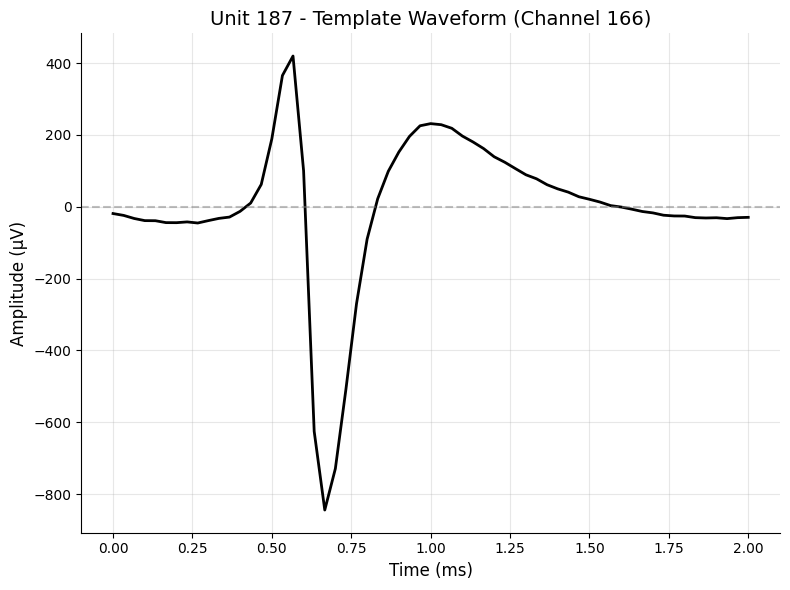


📊 Template Waveform:
   - Peak amplitude: 844.2 µV
   - Duration: 333 µs


In [206]:
# Create figure and plot template waveform
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Get data for this unit
max_ch = int(quality_metrics['maxChannels'][unit_idx])
waveform = template_waveforms[unit_idx, :, max_ch]

# Time axis in milliseconds
time_samples = np.arange(len(waveform))
time_ms = time_samples / param['ephys_sample_rate'] * 1000

# Plot waveform
ax.plot(time_ms, waveform, 'k-', linewidth=2)
ax.axhline(0, color='gray', linestyle='--', alpha=0.5)
ax.set_xlabel('Time (ms)', fontsize=12)
ax.set_ylabel('Amplitude (µV)', fontsize=12)
ax.set_title(f'Unit {unit_idx} - Template Waveform (Channel {max_ch})', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Template Waveform:")
print(f"   - Peak amplitude: {np.max(np.abs(waveform)):.1f} µV")
print(f"   - Duration: {quality_metrics['waveformDuration_peakTrough'][unit_idx]:.0f} µs")

## 3.2 Raw Waveform Overlay

**Purpose:** Visualize variability in individual spike waveforms.

**What it shows:**
- Overlaid raw waveforms from individual spikes
- Template waveform overlaid in different color
- Shows spike-to-spike variability

**Parameters used:**
- `param["nRawSpikesToExtract"]`: Number of raw spikes to extract (default 100)
- `param["extractRaw"]`: Must be True to extract raw waveforms

**Data requirements:**
- Raw waveforms extracted from binary file
- Requires raw data file path in `param["raw_data_file"]`
- Saved in `bombcell/raw_waveforms/` directory

**How to modify your BombCell runs:**
```python
# Enable raw waveform extraction
param["extractRaw"] = True
param["nRawSpikesToExtract"] = 100  # or more for better visualization
param["raw_data_file"] = "path/to/recording.bin"
```

**Note:** This plot requires raw data access. If not available, it will show template waveform only.

In [207]:
# Check if raw waveforms are available
raw_wf_dir = Path(param['ephysKilosortPath']) / 'bombcell' / 'raw_waveforms'

if raw_wf_dir.exists():
    # Load raw waveforms for this unit
    try:
        raw_wf_file = raw_wf_dir / f'unit_{unit_id}_raw_waveforms.npy'
        if raw_wf_file.exists():
            raw_waveforms = np.load(raw_wf_file)
            
            # Plot
            fig, ax = plt.subplots(1, 1, figsize=(8, 6))
            time_ms = np.arange(raw_waveforms.shape[1]) / param['ephys_sample_rate'] * 1000
            
            # Plot individual waveforms
            for i in range(min(50, raw_waveforms.shape[0])):
                ax.plot(time_ms, raw_waveforms[i, :], 'k-', alpha=0.1, linewidth=0.5)
            
            # Overlay template
            template_time = np.arange(len(waveform)) / param['ephys_sample_rate'] * 1000
            ax.plot(template_time, waveform, 'r-', linewidth=2, label='Template')
            
            ax.axhline(0, color='gray', linestyle='--', alpha=0.5)
            ax.set_xlabel('Time (ms)', fontsize=12)
            ax.set_ylabel('Amplitude (µV)', fontsize=12)
            ax.set_title(f'Unit {unit_idx} - Raw Waveforms Overlay', fontsize=14)
            ax.legend()
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
            
            print(f"\n📊 Raw Waveforms: Showing {min(50, raw_waveforms.shape[0])} spikes")
        else:
            print(f"⚠️ Raw waveforms not found for unit {unit_id}")
    except Exception as e:
        print(f"⚠️ Error loading raw waveforms: {e}")
else:
    print("\n⚠️ Raw waveforms not available. To extract:")
    print("   1. Set param['extractRaw'] = True")
    print("   2. Set param['raw_data_file'] = 'path/to/recording.bin'")
    print("   3. Re-run BombCell")


⚠️ Raw waveforms not available. To extract:
   1. Set param['extractRaw'] = True
   2. Set param['raw_data_file'] = 'path/to/recording.bin'
   3. Re-run BombCell


## 3.3 Autocorrelogram (ACG)

**Purpose:** Visualize temporal spiking patterns and refractory period.

**What it shows:**
- Auto-correlation of spike times
- Refractory period (should be empty near 0ms)
- Post-spike suppression or bursting patterns
- Red shaded region: Refractory period violations (RPVs)

**Parameters used:**
- `cbin`: Bin size in milliseconds (default 0.5ms)
- `cwin`: Window size in milliseconds (default 100ms)
- `param["tauR_valuesMin"]`: Refractory period duration

**Data requirements:**
- Spike times from `spike_times.npy`
- Spike clusters from `spike_clusters.npy`

**How to modify your BombCell runs:**
- No special modifications needed - always available

In [208]:
spike_times_path = ks_dir / "spike_times.npy"
spike_clusters_path = ks_dir / "spike_clusters.npy"
spike_amplitudes_path = ks_dir / "amplitudes.npy"
channel_positions_path = ks_dir / "channel_positions.npy"

# load .npy
spike_times = np.load(spike_times_path)
spike_clusters = np.load(spike_clusters_path)
spike_amplitudes = np.load(spike_amplitudes_path)
channel_positions = np.load(channel_positions_path)
spike_clusters, spike_times, spike_amplitudes, channel_positions

(array([605,  59, 107, ...,  56, 123,  76], shape=(59026802,), dtype=int32),
 array([        1,        14,        18, ..., 278854025, 278854030,
        278854030], shape=(59026802,)),
 array([12.172653, 22.56001 , 11.592046, ..., 20.443012, 15.385699,
        19.241278], shape=(59026802,), dtype=float32),
 array([[ 527.,  720.],
        [ 559.,  720.],
        [ 527.,  735.],
        [ 559.,  735.],
        [ 527.,  750.],
        [ 559.,  750.],
        [ 527.,  765.],
        [ 559.,  765.],
        [ 527.,  780.],
        [ 559.,  780.],
        [ 527.,  795.],
        [ 559.,  795.],
        [ 527.,  810.],
        [ 559.,  810.],
        [ 527.,  825.],
        [ 559.,  825.],
        [ 527.,  840.],
        [ 559.,  840.],
        [ 527.,  855.],
        [ 559.,  855.],
        [ 527.,  870.],
        [ 559.,  870.],
        [ 527.,  885.],
        [ 559.,  885.],
        [ 527.,  900.],
        [ 559.,  900.],
        [ 527.,  915.],
        [ 559.,  915.],
        [ 527.,  930

In [209]:
unit_spike_times = spike_times[spike_clusters == unit_id]
print(f"\n⏱️ Unit {unit_idx} Spike Times:")
print(f"Total spikes for unit {unit_idx}: {len(unit_spike_times)}")



⏱️ Unit 187 Spike Times:
Total spikes for unit 187: 16891


In [210]:
# Compute autocorrelogram
from bombcell.ccg_fast import acg

# Compute ACG
cbin = 0.5  # ms
cwin = 100  # ms
correlogram = acg(
    spike_train=unit_spike_times,
    cbin=5,  # Convert to seconds
    cwin=100  # Convert to seconds
)
correlogram

array([ 7.8503345 ,  9.05807827,  9.70931265, 10.02900953, 10.33686579,
       11.80510331, 11.88798769, 10.75128767,  9.55538452, 10.14741578,
        0.        , 10.14741578,  9.55538452, 10.75128767, 11.88798769,
       11.80510331, 10.33686579, 10.02900953,  9.70931265,  9.05807827,
        7.8503345 ])

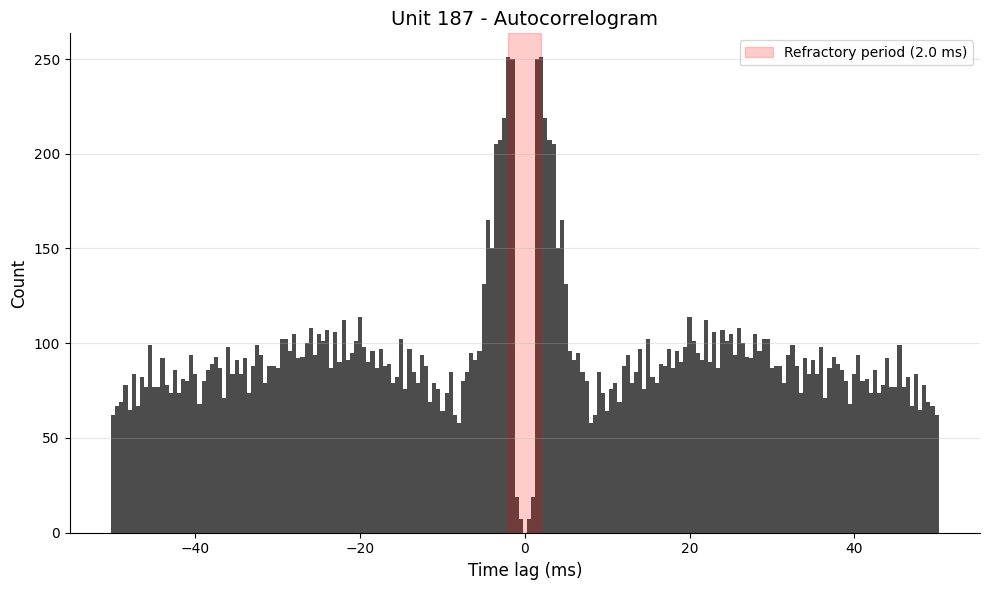


📊 Autocorrelogram:
   - RPV count: 552 spikes
   - RPV fraction: 1.0000
   - Total spikes: 16891


In [212]:
# Compute autocorrelogram
from bombcell.ccg_fast import acg

# ---- old code ----
# correlogram = acg(
#     spike_train=unit_spike_times,
#     cbin=cbin / 1000,  # Convert to seconds
#     cwin=cwin / 1000  # Convert to seconds
# )
#
# bin_centers = (acg_bins[:-1] + acg_bins[1:]) / 2 * 1000  # Convert to ms
# ax.bar(bin_centers, acg_counts, width=cbin, color='black', alpha=0.7)

# ---- new code ----
fs = 30000
cbin = 0.5   # ms
cwin = 100.0 # ms

correlogram = acg(
    spike_train=unit_spike_times,  # should be in SAMPLES (uint-like). See note below.
    cbin=cbin,                     # ms (do NOT divide by 1000)
    cwin=cwin,                     # ms (do NOT divide by 1000)
    fs=fs,
    normalize="counts",
)

acg_counts = np.asarray(correlogram).squeeze()
n_bins = acg_counts.size

# Construct lag centers in ms, centered at 0
bin_centers = (np.arange(n_bins) - (n_bins // 2)) * cbin  # ms

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.bar(bin_centers, acg_counts, width=cbin, color='black', alpha=0.7)

# Mark refractory period
tau_r = float(param['tauR_valuesMin']) * 1000.0  # ms
ax.axvspan(-tau_r, tau_r, alpha=0.2, color='red', label=f'Refractory period ({tau_r:.1f} ms)')

ax.set_xlabel('Time lag (ms)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title(f'Unit {unit_idx} - Autocorrelogram', fontsize=14)
ax.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Count RPVs (exclude the 0-lag bin)
mask_rpv = (np.abs(bin_centers) < tau_r) & (bin_centers != 0)
rpv_count = int(np.sum(acg_counts[mask_rpv]))

print(f"\n📊 Autocorrelogram:")
print(f"   - RPV count: {rpv_count} spikes")
print(f"   - RPV fraction: {quality_metrics['fractionRPVs_estimatedTauR'][unit_idx]:.4f}")
print(f"   - Total spikes: {len(unit_spike_times)}")


## 3.4 Amplitude Histogram with Gaussian Fit

**Purpose:** Visualize spike amplitude distribution and detect missing spikes.

**What it shows:**
- Histogram of spike amplitudes
- Gaussian fit to amplitude distribution
- Left tail: Potentially missing small spikes (below detection threshold)
- Estimated percentage of missing spikes

**Parameters used:**
- `param["minAmplitude"]`: Minimum amplitude threshold for good units

**Data requirements:**
- Spike amplitudes from `amplitudes.npy`
- `percentageSpikesMissing_gaussian` from quality metrics

**How to modify your BombCell runs:**
- No special modifications needed - always available

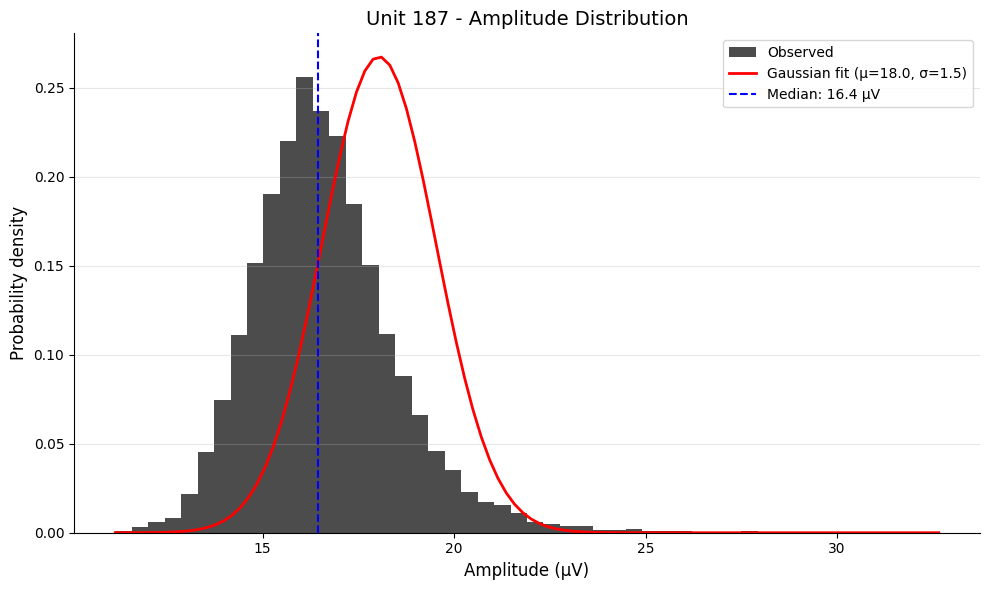


📊 Amplitude Distribution:
   - Mean: 16.6 µV
   - Median: 16.4 µV
   - Std: 1.9 µV
   - Estimated missing spikes: 1.9%


In [213]:
# Get amplitudes for this unit
unit_amplitudes = spike_amplitudes[spike_clusters == unit_id]

if len(unit_amplitudes) > 0:
    # Plot histogram
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    counts, bins, patches = ax.hist(
        unit_amplitudes,
        bins=50,
        density=True,
        color='black',
        alpha=0.7,
        label='Observed'
    )
    
    # Fit Gaussian (if we have the right half of the distribution)
    from scipy import stats
    median_amp = np.median(unit_amplitudes)
    right_half = unit_amplitudes[unit_amplitudes >= median_amp]
    if len(right_half) > 10:
        mu = np.mean(right_half)
        sigma = np.std(right_half)
        x = np.linspace(bins[0], bins[-1], 100)
        gaussian = stats.norm.pdf(x, mu, sigma)
        ax.plot(x, gaussian, 'r-', linewidth=2, label=f'Gaussian fit (μ={mu:.1f}, σ={sigma:.1f})')
    
    ax.axvline(np.median(unit_amplitudes), color='blue', linestyle='--', 
               label=f'Median: {np.median(unit_amplitudes):.1f} µV')
    
    ax.set_xlabel('Amplitude (µV)', fontsize=12)
    ax.set_ylabel('Probability density', fontsize=12)
    ax.set_title(f'Unit {unit_idx} - Amplitude Distribution', fontsize=14)
    ax.legend()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Amplitude Distribution:")
    print(f"   - Mean: {np.mean(unit_amplitudes):.1f} µV")
    print(f"   - Median: {np.median(unit_amplitudes):.1f} µV")
    print(f"   - Std: {np.std(unit_amplitudes):.1f} µV")
    print(f"   - Estimated missing spikes: {quality_metrics['percentageSpikesMissing_gaussian'][unit_idx]:.1f}%")
else:
    print("⚠️ No amplitudes available for this unit")

## 3.5 Spatial Decay Plot

**Purpose:** Visualize how spike amplitude decays with distance from soma.

**What it shows:**
- Spike amplitude on multiple channels vs. distance from peak channel
- Exponential decay fit
- Spatial decay slope (metric for somatic vs. axonal)
- Steeper decay → likely somatic unit
- Shallow decay → likely axonal unit

**Parameters used:**
- `param["computeSpatialDecay"]`: Must be True (default)
- `param["spDecayLinFit"]`: False for exponential fit (default), True for linear
- `param["normalizeSpDecay"]`: Normalize relative to max amplitude
- `param["minSpatialDecaySlopeExp"]`: Min slope for good units
- `param["maxSpatialDecaySlopeExp"]`: Max slope for good units

**Data requirements:**
- Template waveforms
- Channel positions
- `spatialDecaySlope` or `spatialDecayFit` from quality metrics

**How to modify your BombCell runs:**
```python
param["computeSpatialDecay"] = True  # default
param["spDecayLinFit"] = False  # use exponential fit (recommended)
param["normalizeSpDecay"] = True  # normalize to max amplitude
```

In [200]:
spatialDecaySlope = quality_metrics['spatialDecaySlope'][unit_idx]
max_ch = quality_metrics['maxChannels'][unit_idx]
print(f"\n📊 Spatial Decay Slope for Unit {unit_idx}: {spatialDecaySlope}")
print(f"   - Max Channel for Unit {unit_idx}: {max_ch}")

spatialDecaySlope


📊 Spatial Decay Slope for Unit 6: 0.018608433801514453
   - Max Channel for Unit 6: 108


np.float64(0.018608433801514453)

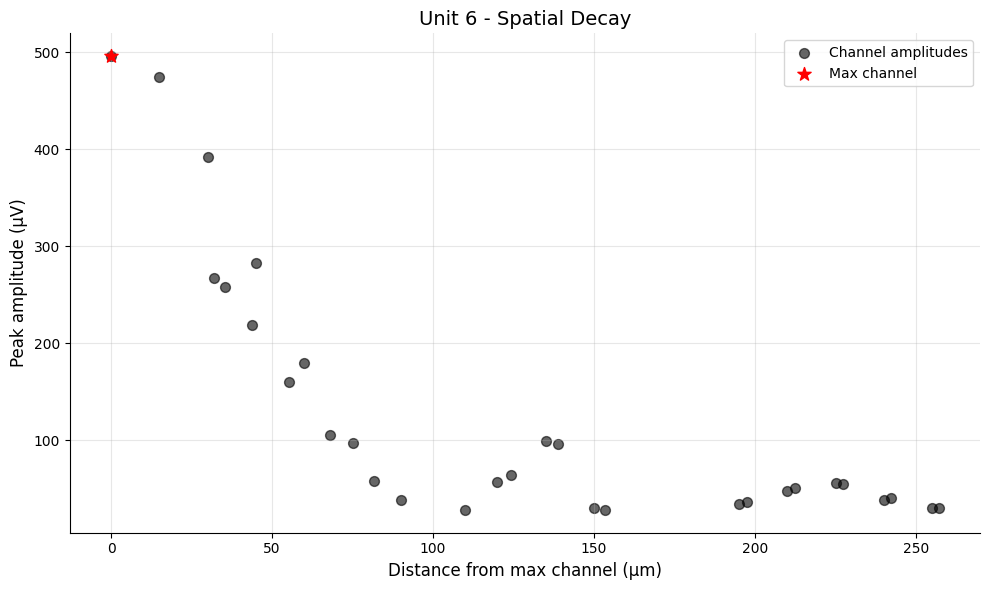


📊 Spatial Decay:
   - Slope: 0.0186
   - Interpretation: Axonal-like


In [201]:
# Check if spatial decay was computed
if 'spatialDecaySlope' in quality_metrics and not np.isnan(quality_metrics['spatialDecaySlope'][unit_idx]):
    # Get spatial decay data
    max_ch = int(quality_metrics['maxChannels'][unit_idx])
    max_ch_pos = channel_positions[max_ch]
    
    # Get peak amplitudes on each channel
    peak_amps = np.max(np.abs(template_waveforms[unit_idx]), axis=0)
    
    # Calculate distances from max channel
    distances = np.sqrt(np.sum((channel_positions - max_ch_pos)**2, axis=1))
    
    # Plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    # Only plot channels with significant amplitude
    threshold = np.max(peak_amps) * 0.05
    valid = peak_amps > threshold
    
    ax.scatter(distances[valid], peak_amps[valid], c='black', s=50, alpha=0.6, label='Channel amplitudes')
    ax.scatter(distances[max_ch], peak_amps[max_ch], c='red', s=100, marker='*', 
               label='Max channel', zorder=10)
    
    # Add exponential fit line if available
    if 'spatialDecayFit' in quality_metrics:
        x_fit = np.linspace(0, np.max(distances[valid]), 100)
        # Exponential: y = a * exp(-b * x)
        slope = quality_metrics['spatialDecaySlope'][unit_idx]
        y_fit = np.max(peak_amps) * np.exp(slope * x_fit)
        ax.plot(x_fit, y_fit, 'r--', linewidth=2, 
                label=f'Exp. fit (slope={slope:.4f})')
    
    ax.set_xlabel('Distance from max channel (µm)', fontsize=12)
    ax.set_ylabel('Peak amplitude (µV)', fontsize=12)
    ax.set_title(f'Unit {unit_idx} - Spatial Decay', fontsize=14)
    ax.legend()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Spatial Decay:")
    print(f"   - Slope: {quality_metrics['spatialDecaySlope'][unit_idx]:.4f}")
    print(f"   - Interpretation: {'Somatic-like' if quality_metrics['spatialDecaySlope'][unit_idx] < -0.01 else 'Axonal-like'}")
else:
    print("\n⚠️ Spatial decay not computed. To enable:")
    print("   param['computeSpatialDecay'] = True")

## 3.6 Amplitude Over Time (Drift Detection)

**Purpose:** Detect amplitude drift over recording duration.

**What it shows:**
- Spike amplitudes plotted against time
- Linear trend line
- Helps identify unstable units or probe drift

**Parameters used:**
- `param["computeDrift"]`: Must be True to compute drift metrics
- `param["driftBinSize"]`: Time bin size in seconds (default 60s)
- `param["maxDrift"]`: Maximum allowed drift in µm

**Data requirements:**
- Spike times and amplitudes
- Optional: `maxDriftEstimate` from quality metrics if computed

**How to modify your BombCell runs:**
```python
param["computeDrift"] = True  # Enables drift estimation (slower)
param["driftBinSize"] = 60  # seconds per bin
```

**Note:** Drift computation adds ~1-2 minutes to analysis time.

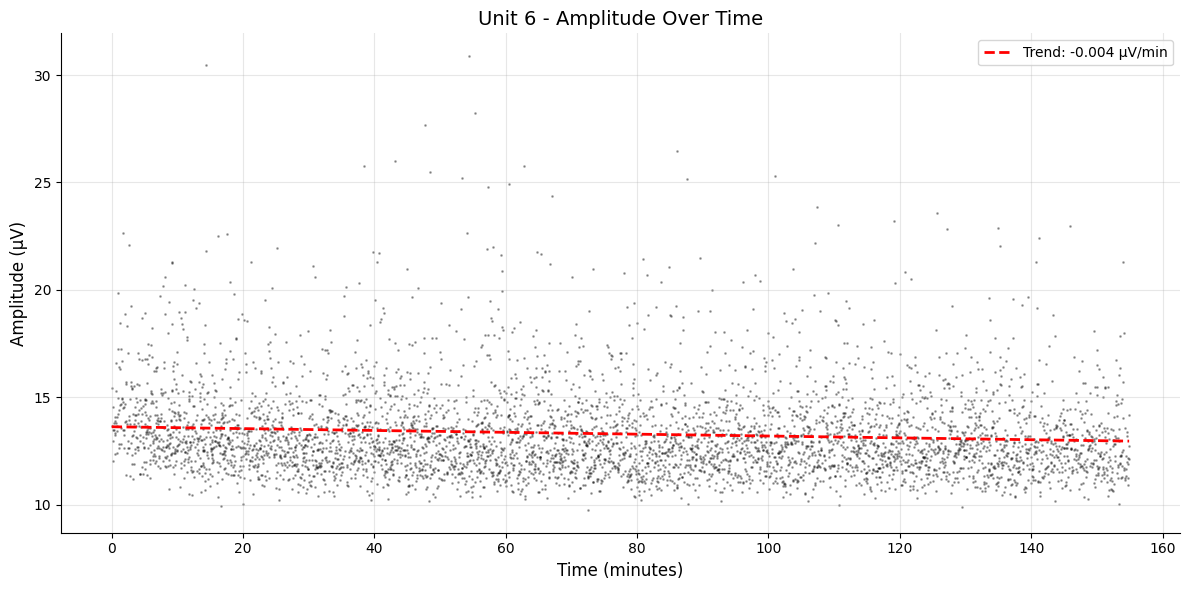


📊 Amplitude Over Time:
   - Recording duration: 154.9 minutes
   - Amplitude range: 7.5 - 38.2 µV
   - Drift rate: -0.004 µV/min
   - Max drift estimate: 5.5 µm


In [202]:
# Get data for this unit
unit_spike_times = spike_times[spike_clusters == unit_id]
unit_amplitudes = spike_amplitudes[spike_clusters == unit_id]

if len(unit_spike_times) > 0 and len(unit_amplitudes) > 0:
    # Plot amplitude over time
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    # Convert to minutes
    time_minutes = unit_spike_times / param['ephys_sample_rate'] / 60
    
    # Downsample for better visualization if too many points
    if len(time_minutes) > 5000:
        step = len(time_minutes) // 5000
        time_plot = time_minutes[::step]
        amp_plot = unit_amplitudes[::step]
    else:
        time_plot = time_minutes
        amp_plot = unit_amplitudes
    
    ax.scatter(time_plot, amp_plot, c='black', s=1, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(time_minutes, unit_amplitudes, 1)
    p = np.poly1d(z)
    ax.plot(time_minutes, p(time_minutes), 'r--', linewidth=2, 
            label=f'Trend: {z[0]:.3f} µV/min')
    
    ax.set_xlabel('Time (minutes)', fontsize=12)
    ax.set_ylabel('Amplitude (µV)', fontsize=12)
    ax.set_title(f'Unit {unit_idx} - Amplitude Over Time', fontsize=14)
    ax.legend()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Amplitude Over Time:")
    print(f"   - Recording duration: {np.max(time_minutes):.1f} minutes")
    print(f"   - Amplitude range: {np.min(unit_amplitudes):.1f} - {np.max(unit_amplitudes):.1f} µV")
    print(f"   - Drift rate: {z[0]:.3f} µV/min")
    if 'maxDriftEstimate' in quality_metrics:
        print(f"   - Max drift estimate: {quality_metrics['maxDriftEstimate'][unit_idx]:.1f} µm")
else:
    print("⚠️ No amplitude data available")

## 3.7 Presence Ratio Over Time

**Purpose:** Visualize unit stability across recording time.

**What it shows:**
- Firing rate in time bins across recording
- Gaps indicate periods where unit was not detected
- Presence ratio: fraction of bins with spikes

**Parameters used:**
- `param["presenceRatioBinSize"]`: Time bin size in seconds (default 60s)
- `param["minPresenceRatio"]`: Minimum required presence ratio for good units

**Data requirements:**
- Spike times
- `presenceRatio` from quality metrics

**How to modify your BombCell runs:**
- No special modifications needed - always computed

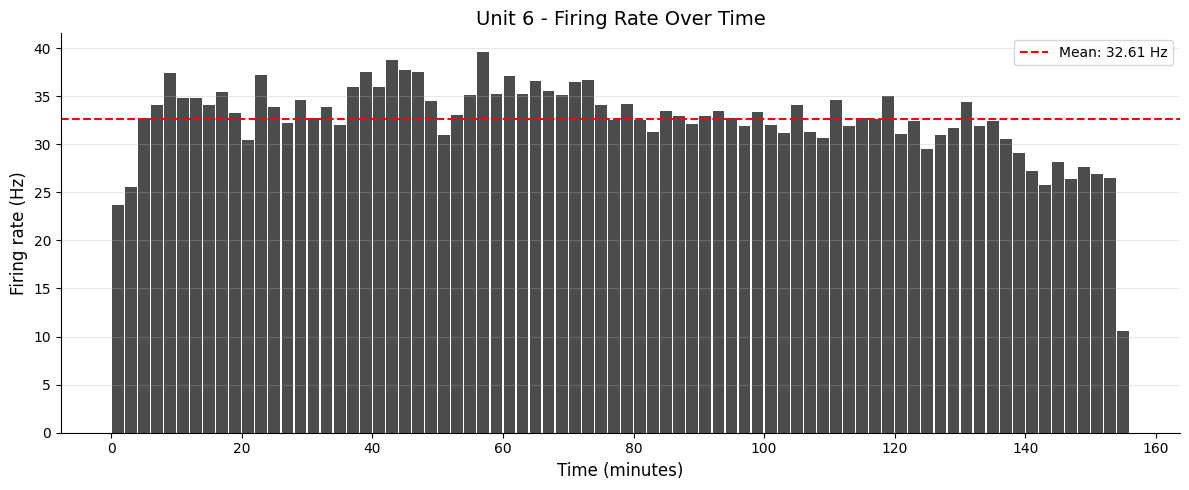


📊 Presence Ratio:
   - Presence ratio: 1.000
   - From QM: 1.000
   - Mean firing rate: 32.61 Hz
   - Active bins: 78/78


In [203]:
# Compute firing rate in bins
unit_spike_times = spike_times[spike_clusters == unit_id]

if len(unit_spike_times) > 0:
    bin_size = param['presenceRatioBinSize'] * param['ephys_sample_rate']  # samples
    max_time = np.max(spike_times)
    n_bins = int(np.ceil(max_time / bin_size))
    
    # Compute spike counts per bin
    bin_counts, bin_edges = np.histogram(unit_spike_times, bins=n_bins, 
                                         range=(0, n_bins * bin_size))
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2 / param['ephys_sample_rate'] / 60  # minutes
    firing_rates = bin_counts / param['presenceRatioBinSize']  # Hz
    
    # Plot
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    ax.bar(bin_centers, firing_rates, width=(bin_centers[1]-bin_centers[0])*0.9, 
           color='black', alpha=0.7)
    ax.axhline(np.mean(firing_rates[firing_rates > 0]), color='red', linestyle='--', 
               label=f'Mean: {np.mean(firing_rates[firing_rates > 0]):.2f} Hz')
    
    ax.set_xlabel('Time (minutes)', fontsize=12)
    ax.set_ylabel('Firing rate (Hz)', fontsize=12)
    ax.set_title(f'Unit {unit_idx} - Firing Rate Over Time', fontsize=14)
    ax.legend()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    presence_ratio = np.sum(bin_counts > 0) / n_bins
    print(f"\n📊 Presence Ratio:")
    print(f"   - Presence ratio: {presence_ratio:.3f}")
    print(f"   - From QM: {quality_metrics['presenceRatio'][unit_idx]:.3f}")
    print(f"   - Mean firing rate: {np.mean(firing_rates[firing_rates > 0]):.2f} Hz")
    print(f"   - Active bins: {np.sum(bin_counts > 0)}/{n_bins}")
else:
    print("⚠️ No spike times available")

## 3.8 Unit Location on Probe

**Purpose:** Visualize unit's spatial location on the probe.

**What it shows:**
- Probe channel layout
- Unit's max channel marked
- Channels with significant amplitude highlighted

**Parameters used:**
- None (uses channel positions)

**Data requirements:**
- Channel positions from `channel_positions.npy` or `channel_map.npy`
- Max channel from quality metrics

**How to modify your BombCell runs:**
- No modifications needed

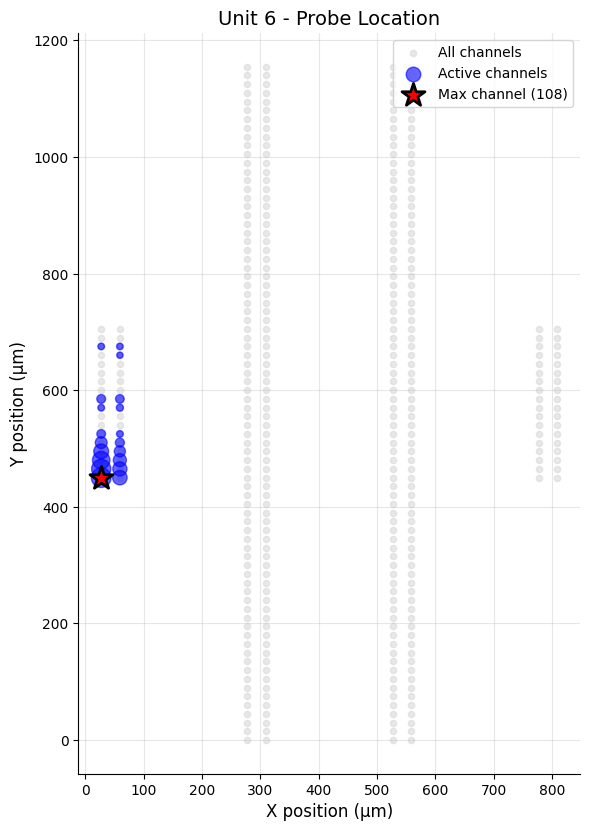


📊 Unit Location:
   - Max channel: 108
   - Position: (27.0, 450.0) µm
   - Active channels: 19
   - Size of blue circles indicates relative peak amplitude on those channels
   - Active Channel Numbers: [108 109 110 111 112 113 114 115 116 117 118 119 124 125 126 127 137 138
 139]


In [204]:
# Plot probe layout with unit location
fig, ax = plt.subplots(1, 1, figsize=(6, 10))

# Get unit data
max_ch = int(quality_metrics['maxChannels'][unit_idx])
peak_amps = np.max(np.abs(template_waveforms[unit_idx]), axis=0)

# Plot all channels
ax.scatter(channel_positions[:, 0], channel_positions[:, 1], 
           c='lightgray', s=20, alpha=0.5, label='All channels')

# Highlight channels with significant amplitude
threshold = np.max(peak_amps) * 0.1
significant = peak_amps > threshold
if np.sum(significant) > 0:
    # Size by amplitude
    sizes = (peak_amps[significant] / np.max(peak_amps)) * 200
    ax.scatter(channel_positions[significant, 0], channel_positions[significant, 1],
               c='blue', s=sizes, alpha=0.6, label='Active channels')
# find channel number for all significant channels
active_channel_numbers = np.where(significant)[0]


# Mark max channel
ax.scatter(channel_positions[max_ch, 0], channel_positions[max_ch, 1],
           c='red', s=300, marker='*', edgecolors='black', linewidths=2,
           label=f'Max channel ({max_ch})', zorder=10)

ax.set_xlabel('X position (µm)', fontsize=12)
ax.set_ylabel('Y position (µm)', fontsize=12)
ax.set_title(f'Unit {unit_idx} - Probe Location', fontsize=14)
ax.legend(loc='upper right')
ax.set_aspect('equal')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Unit Location:")
print(f"   - Max channel: {max_ch}")
print(f"   - Position: ({channel_positions[max_ch, 0]:.1f}, {channel_positions[max_ch, 1]:.1f}) µm")
print(f"   - Active channels: {np.sum(significant)}")
print("   - Size of blue circles indicates relative peak amplitude on those channels")
print(f"   - Active Channel Numbers: {active_channel_numbers}")


---
# 4. Cell Type Classification Plots

BombCell can classify units into cell types based on electrophysiological properties.
These plots are separate from quality metrics classification.

## 4.1 Compute Ephys Properties

First, compute electrophysiological properties needed for cell type classification:

In [170]:
# Compute ephys properties
print("Computing electrophysiological properties...")
ephys_properties = bc.compute_all_ephys_properties(
    ephys_path=ks_dir,
    param=param,
    save_path=save_path,

)

print("\n✅ Computed ephys properties:")
print(f"   Keys: {list(ephys_properties.keys())}")




Computing electrophysiological properties...
Computing ephys properties for 820 units ...


Computing ephys properties:   0%|          | 0/820 [00:00<?, ?it/s]

KeyError: 'min_spikes_for_stats'

## 4.2 Cortical Cell Classification

**Purpose:** Classify cortical units as pyramidal cells (wide-spiking) or interneurons (narrow-spiking).

**What it shows:**
- Scatter plot of waveform duration vs. another property
- Classification threshold line
- Units colored by classification

**Classification criteria:**
- **Narrow-spiking (interneurons)**: Waveform duration < 400 µs
- **Wide-spiking (pyramidal)**: Waveform duration ≥ 400 µs

**Parameters used:**
- Waveform duration threshold (hardcoded at 400 µs)

**Data requirements:**
- Ephys properties (waveform duration, post-spike suppression)

**How to modify your BombCell runs:**
- Run `compute_ephys_properties()` after quality metrics

In [171]:
# Classify cortical cells
cortex_cell_types = bc.classify_cortex_cells(ephys_properties)

# Plot classification
fig = bc.plot_cortex_classification(ephys_properties, cortex_cell_types)
plt.show()

# Count each type
unique_types, counts = np.unique(cortex_cell_types, return_counts=True)
print("\n📊 Cortical Cell Classification:")
for cell_type, count in zip(unique_types, counts):
    print(f"   - {cell_type}: {count} units ({count/len(cortex_cell_types)*100:.1f}%)")

AttributeError: module 'bombcell' has no attribute 'classify_cortex_cells'

## 4.3 Striatal Cell Classification

**Purpose:** Classify striatal units into MSN, FSI, TAN, or UIN.

**What it shows:**
- 2D scatter plot of waveform duration vs. post-spike suppression
- Classification boundaries
- Units colored by cell type

**Classification criteria:**
- **MSN (Medium Spiny Neurons)**: Wide waveform (>400 µs), high post-spike suppression
- **FSI (Fast-Spiking Interneurons)**: Narrow waveform (<400 µs), low post-spike suppression  
- **TAN (Tonically Active Neurons)**: Wide waveform, low post-spike suppression
- **UIN (Unidentified Interneurons)**: Other combinations

**Parameters used:**
- Waveform duration threshold: 400 µs
- Post-spike suppression threshold: varies by cell type

**Data requirements:**
- Ephys properties (waveform duration, post-spike suppression from ACG)

**How to modify your BombCell runs:**
- Run `compute_ephys_properties()` after quality metrics

In [ ]:
# Classify striatal cells
striatum_cell_types = bc.classify_striatum_cells(ephys_properties)

# Plot classification
fig = bc.plot_striatum_classification(ephys_properties, striatum_cell_types)
plt.show()

# Count each type
unique_types, counts = np.unique(striatum_cell_types, return_counts=True)
print("\n📊 Striatal Cell Classification:")
for cell_type, count in zip(unique_types, counts):
    print(f"   - {cell_type}: {count} units ({count/len(striatum_cell_types)*100:.1f}%)")

---
# 5. Interactive GUI

The BombCell GUI provides an interactive way to browse through units and visualize all their properties.

## 5.1 Launch Interactive Unit Quality GUI

**Purpose:** Browse through units interactively with all visualizations in one view.

**Features:**
- Navigation buttons (Next/Previous unit)
- Unit selection dropdown
- 10+ plots per unit displayed simultaneously:
  - Template waveform (multi-channel)
  - Raw waveform overlay
  - Autocorrelogram
  - Amplitude histogram
  - Spatial decay
  - Amplitude over time
  - Time bin metrics
  - Unit location
  - Quality metrics summary
  - Classification label

**Requirements:**
- Jupyter notebook environment
- `ipywidgets` package (installed with BombCell)

**Usage:**
- Click "Next" to browse through units
- Use dropdown to jump to specific unit
- All plots update automatically

In [ ]:
# Launch interactive GUI
print("Launching Interactive Unit Quality GUI...")
print("Use the buttons and dropdown to navigate between units.\n")

# Prepare ephys data dict
ephys_data = {
    'spike_times': spike_times,
    'spike_clusters': spike_clusters,
    'spike_templates': spike_templates,
    'template_waveforms': template_waveforms,
    'templates': template_waveforms,
    'channel_positions': channel_positions,
    'cluster_ids': cluster_ids,
    'spike_amplitudes': spike_amplitudes
}

# Launch GUI
gui = bc.unit_quality_gui(
    ephys_data=ephys_data,
    quality_metrics=quality_metrics,
    param=param,
    unit_type_string=unit_type_string
)

print("✅ GUI launched! Use the interface above to browse units.")

## 5.2 Pre-compute GUI Data for Fast Loading

**Purpose:** Pre-compute all visualizations for faster GUI performance on large datasets.

**What it does:**
- Pre-computes all peak/trough locations
- Pre-computes spatial decay fits
- Pre-computes amplitude fits
- Saves to disk as `.pkl` file
- GUI loads pre-computed data instead of computing on-the-fly

**Benefits:**
- Much faster unit switching in GUI (instant vs. 1-2 seconds)
- Recommended for datasets with >100 units

**Parameters used:**
- `param["verbose"]`: Print progress updates

**How to use:**
1. Run pre-computation once (takes 1-5 minutes for typical dataset)
2. GUI will automatically load pre-computed data on subsequent runs

In [ ]:
# Pre-compute GUI data
print("Pre-computing visualization data for GUI...")
print("This may take a few minutes but only needs to be done once.\n")

gui_data = bc.precompute_gui_data(
    ephys_data=ephys_data,
    quality_metrics=quality_metrics,
    param=param,
    save_path=None  # Saves to default location: kilosort_path/bombcell/for_GUI/
)

print("\n✅ GUI data pre-computed and saved!")
print("   Future GUI launches will be much faster.")
print(f"   Saved to: {Path(param['ephysKilosortPath']) / 'bombcell' / 'for_GUI' / 'gui_data.pkl'}")

---
# 6. Summary & Export

Final summary and options for exporting results.

## 6.1 Export Results for Phy

BombCell can export results as TSV files compatible with Phy for manual curation:

In [ ]:
# Results are automatically saved if saveAsTSV=True in param
if param.get('saveAsTSV', False):
    print("✅ Results already saved as TSV files in:")
    print(f"   {Path(param['ephysKilosortPath']) / 'bombcell'}")
    print("\nFiles created:")
    print("   - qMetrics.tsv: All quality metrics")
    if param.get('unit_type_for_phy', False):
        print("   - cluster_unit_type.tsv: Unit classifications for Phy")
else:
    print("💡 To enable TSV export for Phy:")
    print("   param['saveAsTSV'] = True")
    print("   param['unit_type_for_phy'] = True")

## 6.2 Create Summary Table

Create a pandas DataFrame with all results for easy analysis:

In [ ]:
# Create summary DataFrame
summary_df = pd.DataFrame()

# Add unit IDs
summary_df['unit_id'] = param.get('unique_templates', np.arange(len(unit_type)))
summary_df['unit_classification'] = unit_type_string

# Add key quality metrics
key_metrics = [
    'rawAmplitude', 'signalToNoiseRatio', 'fractionRPVs_estimatedTauR',
    'nSpikes', 'presenceRatio', 'percentageSpikesMissing_gaussian',
    'waveformDuration_peakTrough', 'spatialDecaySlope'
]

for metric in key_metrics:
    if metric in quality_metrics:
        summary_df[metric] = quality_metrics[metric]

# Display
print("\n📊 Summary Table (first 10 units):")
print(summary_df.head(10))

# Save to CSV
output_path = Path(param['ephysKilosortPath']) / 'bombcell' / 'summary_table.csv'
summary_df.to_csv(output_path, index=False)
print(f"\n✅ Saved summary table to: {output_path}")

## 6.3 Final Summary

Complete analysis summary:

In [ ]:
print("\n" + "="*60)
print("🎉 BOMBCELL ANALYSIS COMPLETE 🎉")
print("="*60)

print(f"\n📁 Session: {param['ephysKilosortPath']}")
print(f"\n📊 Total units analyzed: {len(unit_type)}")

print("\n🔍 Classification breakdown:")
for utype, count in zip(*np.unique(unit_type_string, return_counts=True)):
    percentage = (count / len(unit_type)) * 100
    print(f"   {utype:20s}: {count:4d} ({percentage:5.1f}%)")

print("\n📈 Key statistics:")
good_units = unit_type_string == 'GOOD'
if np.sum(good_units) > 0:
    print(f"   Mean amplitude (good units): {np.mean(quality_metrics['rawAmplitude'][good_units]):.1f} µV")
    print(f"   Mean SNR (good units): {np.mean(quality_metrics['signalToNoiseRatio'][good_units]):.2f}")
    print(f"   Mean RPV (good units): {np.mean(quality_metrics['fractionRPVs_estimatedTauR'][good_units]):.4f}")

print("\n💾 Output files saved to:")
print(f"   {Path(param['ephysKilosortPath']) / 'bombcell'}")

print("\n✅ All plotting capabilities demonstrated!")
print("="*60)

---
# Appendix: Quick Reference

## All Plotting Functions Summary

### Summary Plots
```python
# All summary plots at once
bc.plot_summary_data(quality_metrics, template_waveforms, unit_type, unit_type_string, param)

# Individual summary plots
bc.plot_waveforms_overlay(quality_metrics, template_waveforms, unit_type, param)
bc.plot_histograms(quality_metrics, param)
bc.upset_plots(quality_metrics, unit_type_string, param)
```

### Interactive GUI
```python
# Launch GUI
gui = bc.unit_quality_gui(ephys_data, quality_metrics, param)

# Pre-compute for faster loading
gui_data = bc.precompute_gui_data(ephys_data, quality_metrics, param)
```

### Cell Type Classification
```python
# Compute properties
ephys_properties = bc.compute_ephys_properties(param, spike_times, spike_clusters, 
                                                template_waveforms, quality_metrics)

# Classify and plot
cortex_types = bc.classify_cortex_cells(ephys_properties)
bc.plot_cortex_classification(ephys_properties, cortex_types)

striatum_types = bc.classify_striatum_cells(ephys_properties)
bc.plot_striatum_classification(ephys_properties, striatum_types)
```

## Key Parameters to Modify

### Enable Optional Computations
```python
param["computeDrift"] = True  # Adds ~1-2 min
param["computeDistanceMetrics"] = True  # Adds ~5-10 min
param["splitGoodAndMua_NonSomatic"] = True  # 5 categories instead of 4
```

### Adjust Classification Thresholds
```python
# MUA thresholds
param["maxRPVviolations"] = 0.1
param["minAmplitude"] = 40  # µV
param["minSNR"] = 5
param["maxPercSpikesMissing"] = 20
param["minPresenceRatio"] = 0.7
param["minNumSpikes"] = 300

# Waveform thresholds
param["maxNPeaks"] = 2
param["maxNTroughs"] = 1
param["minWvDuration"] = 100  # µs
param["maxWvDuration"] = 1150  # µs
```

## Troubleshooting

**No raw waveforms:**
```python
param["extractRaw"] = True
param["raw_data_file"] = "path/to/recording.bin"
```

**No drift metrics:**
```python
param["computeDrift"] = True
```

**No distance metrics:**
```python
param["computeDistanceMetrics"] = True
```

**Plots not saving:**
```python
param["savePlots"] = True
param["plotsSaveDir"] = "path/to/save/directory"  # optional
```